## IMPORTS

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import skfuzzy.control as ctrl
import plotly.graph_objects as go
import random

## Design Membership Functions.

> ***Input Variables.***

In [2]:
x_income = np.arange(0, 101, 1)
x_history = np.arange(0, 101, 1)
x_age = np.arange(0, 101, 1)

age_young = fuzz.gaussmf(x_age, 20, 10)  
age_middle_aged = fuzz.gaussmf(x_age, 50, 10)  
age_old = fuzz.gaussmf(x_age, 80, 10)

income_low = fuzz.trapmf(x_income, [0, 0,10, 50])
income_medium = fuzz.trimf(x_income, [25, 50, 75])
income_high = fuzz.trapmf(x_income, [50, 90, 100, 100])

history_rarely = fuzz.trimf(x_history, [0, 0, 30])
history_occasionally = fuzz.trimf(x_history, [20, 50, 80])
history_frequently = fuzz.trimf(x_history, [60, 100, 100])

> ***Output_Variable.***

In [3]:
x_likelihood = np.arange(0, 101, 1)

likelihood_low = fuzz.trimf(x_likelihood, [0, 0, 30])
likelihood_medium = fuzz.trimf(x_likelihood, [20, 50, 80])
likelihood_high = fuzz.trimf(x_likelihood, [60, 100, 100])

> ***Input plots.***

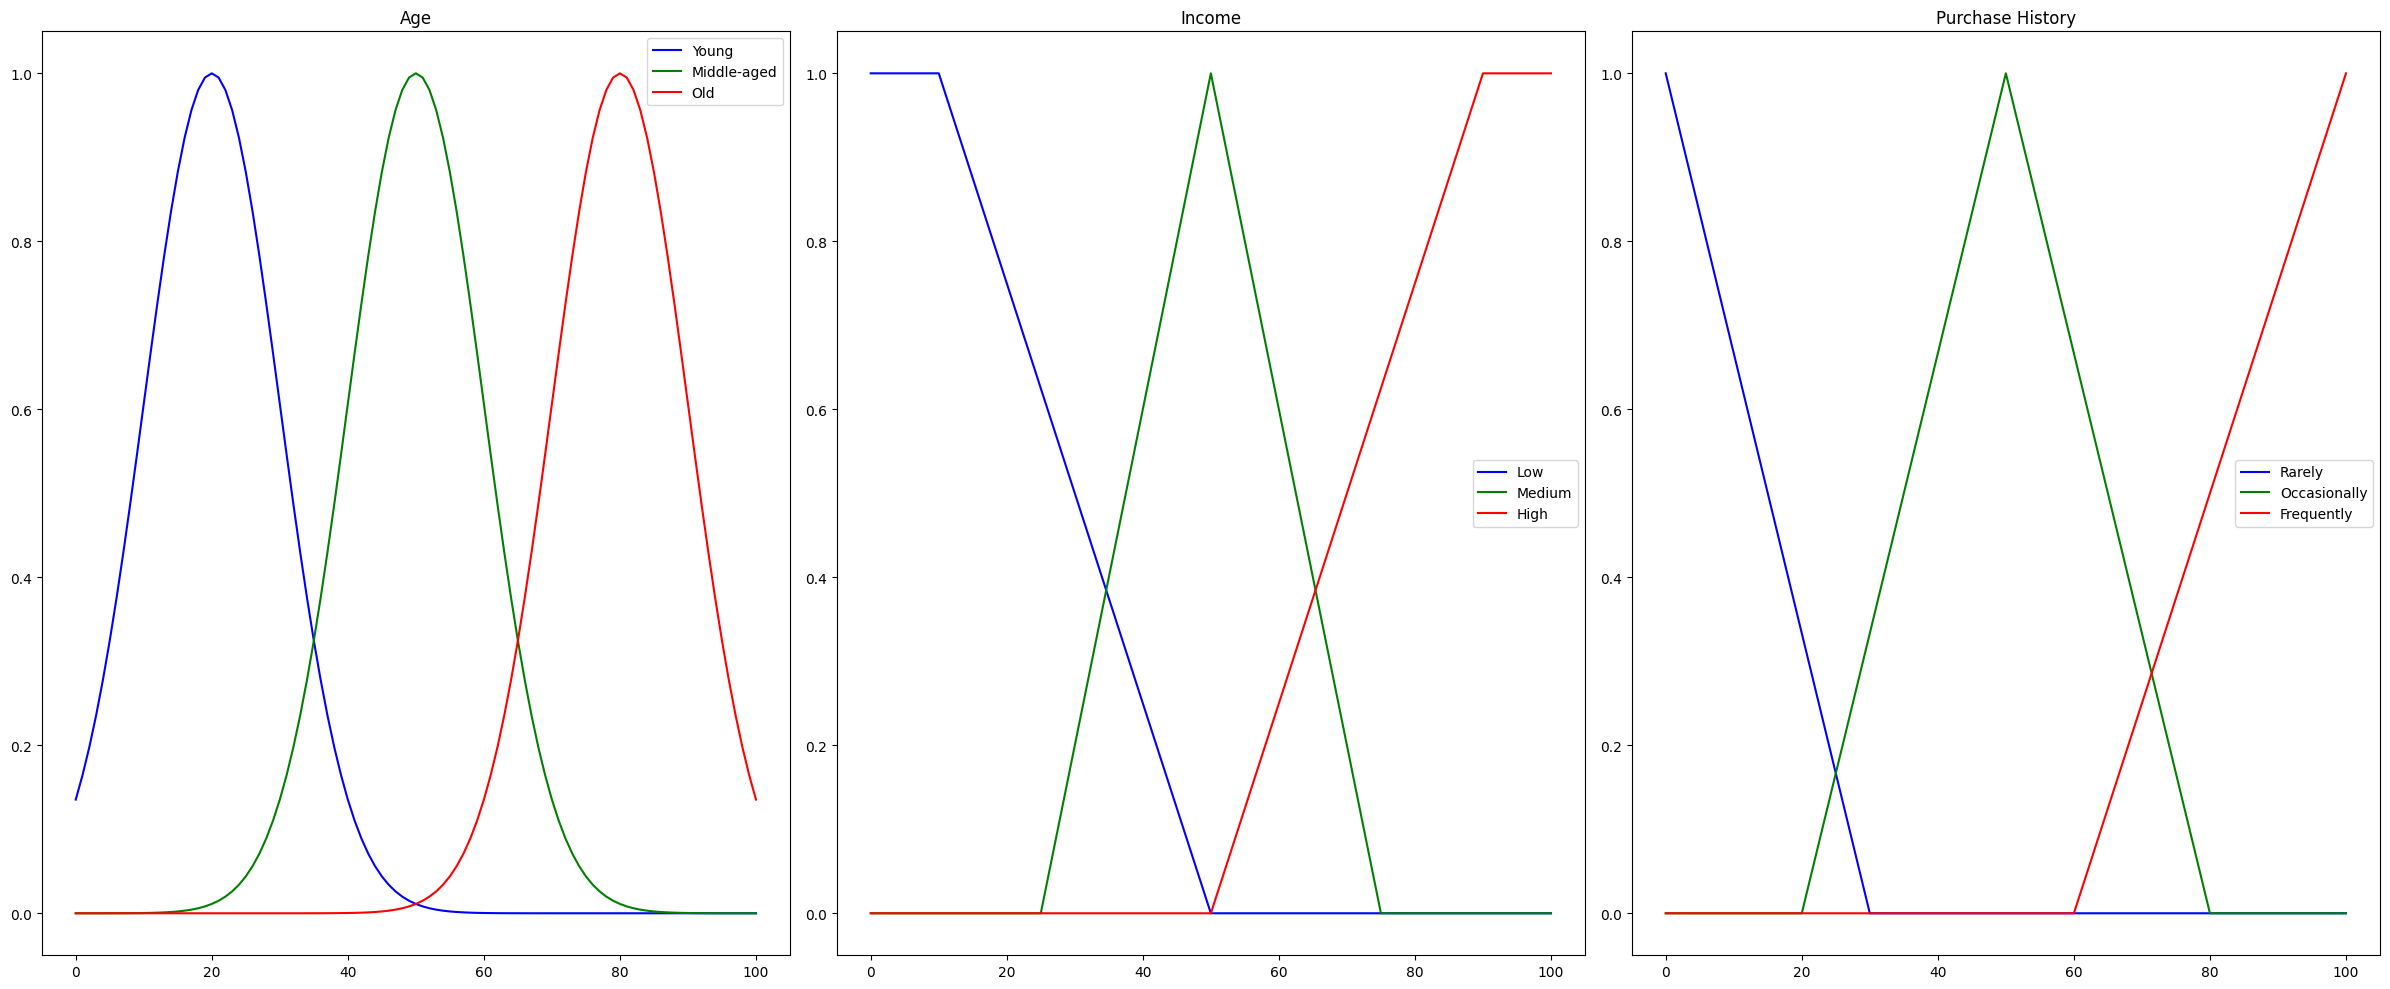

In [4]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(24, 10))

ax0.plot(x_age, age_young, 'b', linewidth=1.5, label='Young')
ax0.plot(x_age, age_middle_aged, 'g', linewidth=1.5, label='Middle-aged')
ax0.plot(x_age, age_old, 'r', linewidth=1.5, label='Old')
ax0.set_title('Age')
ax0.legend()

ax1.plot(x_income, income_low, 'b', linewidth=1.5, label='Low')
ax1.plot(x_income, income_medium, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_income, income_high, 'r', linewidth=1.5, label='High')
ax1.set_title('Income')
ax1.legend()

ax2.plot(x_history, history_rarely, 'b', linewidth=1.5, label='Rarely')
ax2.plot(x_history, history_occasionally, 'g', linewidth=1.5, label='Occasionally')
ax2.plot(x_history, history_frequently, 'r', linewidth=1.5, label='Frequently')
ax2.set_title('Purchase History')
ax2.legend()

plt.tight_layout()
plt.show()

## Inference Engine.

> ***Variables with their membership functions***

In [4]:
age = ctrl.Antecedent(x_age, 'age')
income = ctrl.Antecedent(x_income, 'income')
history = ctrl.Antecedent(x_history, 'history')
likelihood = ctrl.Consequent(x_likelihood, 'likelihood')

age['young'] = age_young
age['middle-aged'] = age_middle_aged
age['old'] = age_old

income['low'] = income_low
income['medium'] = income_medium
income['high'] = income_high

history['rarely'] = history_rarely
history['occasionally'] = history_occasionally
history['frequently'] = history_frequently

likelihood['low'] = likelihood_low
likelihood['medium'] = likelihood_medium
likelihood['high'] = likelihood_high

> ***Rules, Control System and Simulation.***

In [5]:
rules = [
    ctrl.Rule(age['young'] & income['low'] & history['rarely'], likelihood['low']),
    ctrl.Rule(age['young'] & income['low'] & history['occasionally'], likelihood['medium']),
    ctrl.Rule(age['young'] & income['low'] & history['frequently'], likelihood['medium']),
    ctrl.Rule(age['young'] & income['medium'] & history['rarely'], likelihood['low']),
    ctrl.Rule(age['young'] & income['medium'] & history['occasionally'], likelihood['medium']),
    ctrl.Rule(age['young'] & income['medium'] & history['frequently'], likelihood['high']),
    ctrl.Rule(age['young'] & income['high'] & history['rarely'], likelihood['medium']),
    ctrl.Rule(age['young'] & income['high'] & history['occasionally'], likelihood['high']),
    ctrl.Rule(age['young'] & income['high'] & history['frequently'], likelihood['high']),
    ctrl.Rule(age['middle-aged'] & income['low'] & history['rarely'], likelihood['low']),
    ctrl.Rule(age['middle-aged'] & income['low'] & history['occasionally'], likelihood['medium']),
    ctrl.Rule(age['middle-aged'] & income['low'] & history['frequently'], likelihood['medium']),
    ctrl.Rule(age['middle-aged'] & income['medium'] & history['rarely'], likelihood['low']),
    ctrl.Rule(age['middle-aged'] & income['medium'] & history['occasionally'], likelihood['medium']),
    ctrl.Rule(age['middle-aged'] & income['medium'] & history['frequently'], likelihood['high']),
    ctrl.Rule(age['middle-aged'] & income['high'] & history['rarely'], likelihood['medium']),
    ctrl.Rule(age['middle-aged'] & income['high'] & history['occasionally'], likelihood['high']),
    ctrl.Rule(age['middle-aged'] & income['high'] & history['frequently'], likelihood['high']),
    ctrl.Rule(age['old'] & income['low'] & history['rarely'], likelihood['low']),
    ##
    ctrl.Rule(age['old'] & income['low'] & history['occasionally'], likelihood['low']),
    ctrl.Rule(age['old'] & income['low'] & history['frequently'], likelihood['medium']),
    ctrl.Rule(age['old'] & income['medium'] & history['rarely'], likelihood['low']),
    ctrl.Rule(age['old'] & income['medium'] & history['occasionally'], likelihood['low']),
    ctrl.Rule(age['old'] & income['medium'] & history['frequently'], likelihood['medium']),
    ctrl.Rule(age['old'] & income['high'] & history['rarely'], likelihood['medium']),
    ctrl.Rule(age['old'] & income['high'] & history['occasionally'], likelihood['high']),
    ##
    ctrl.Rule(age['old'] & income['high'] & history['frequently'], likelihood['high'])
]

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\visualization.py:174: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig, self.ax = plt.subplots()


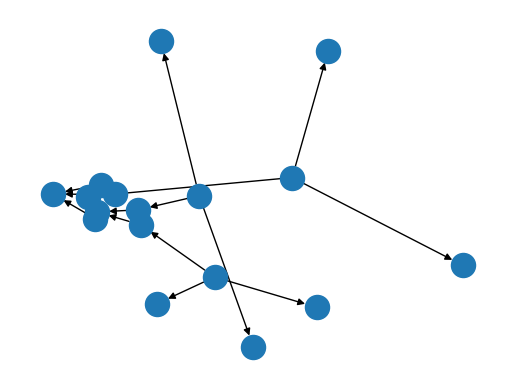

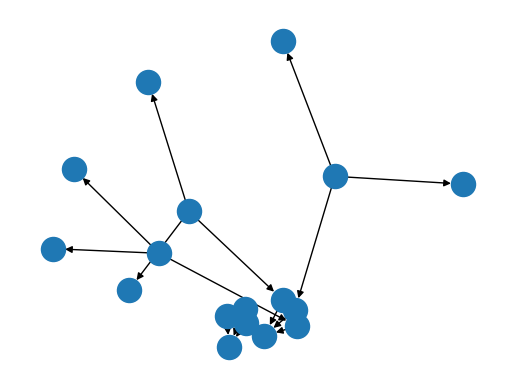

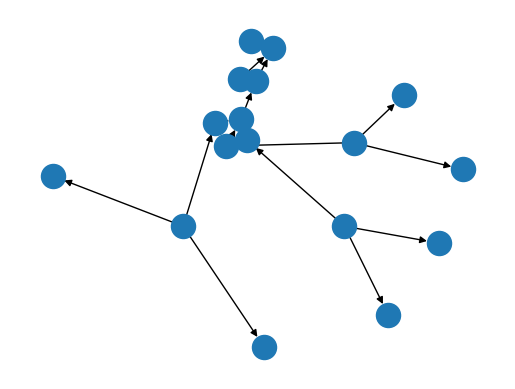

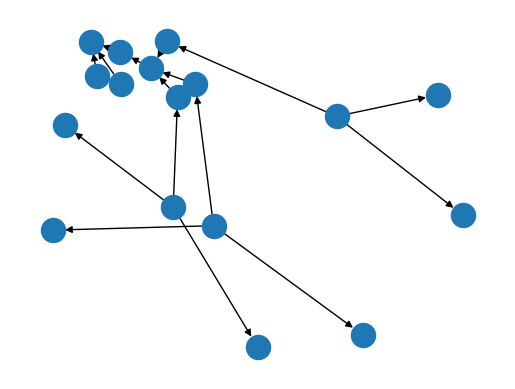

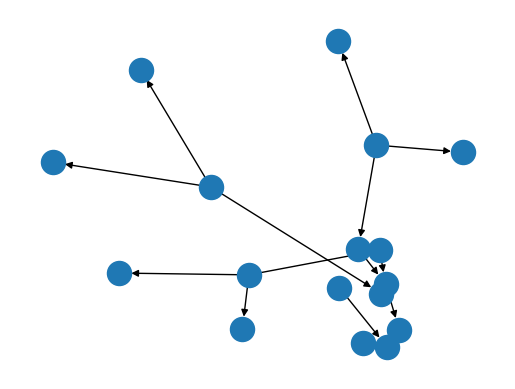

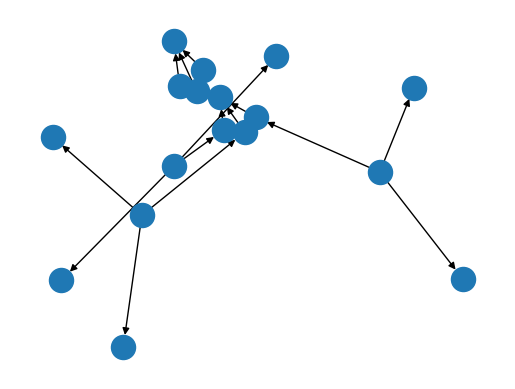

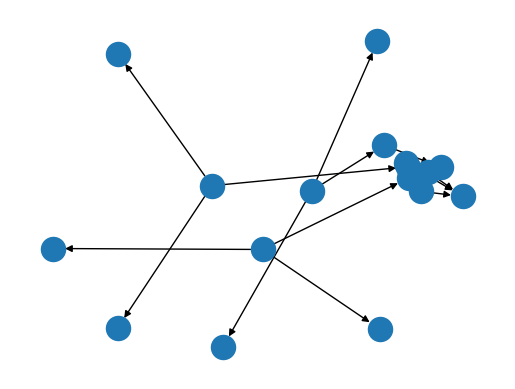

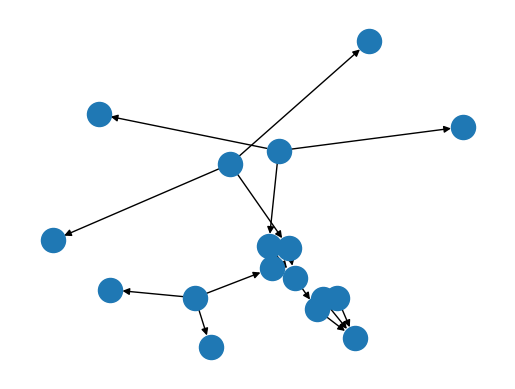

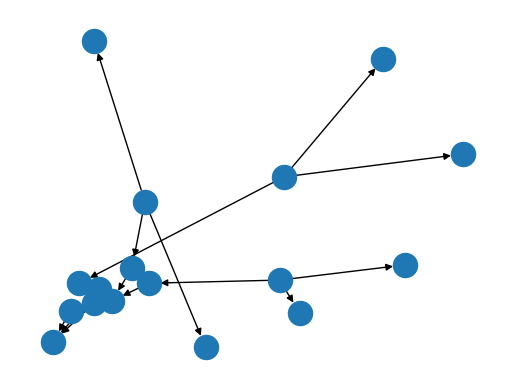

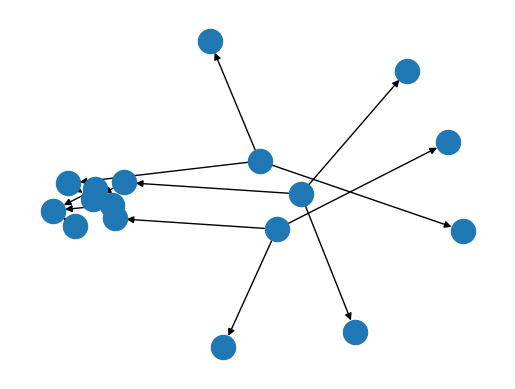

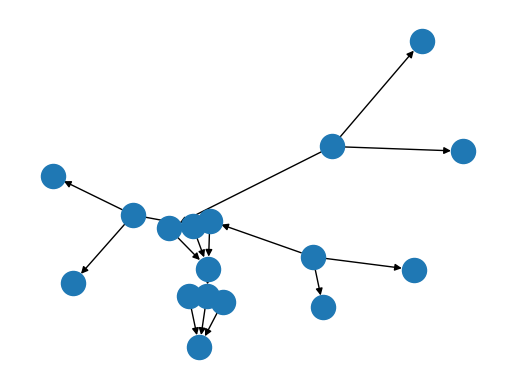

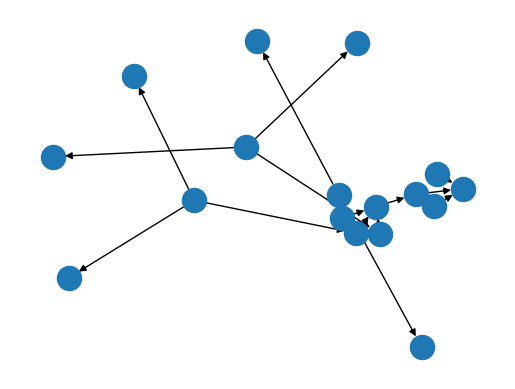

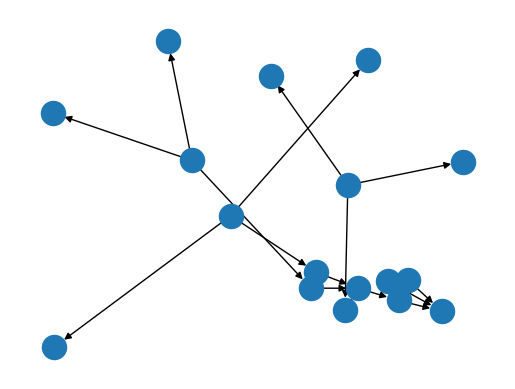

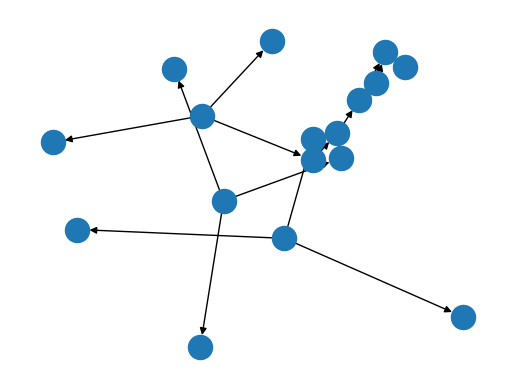

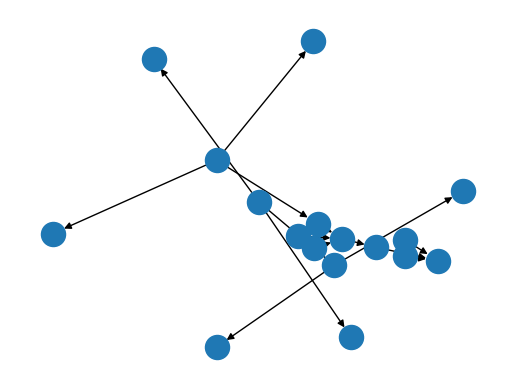

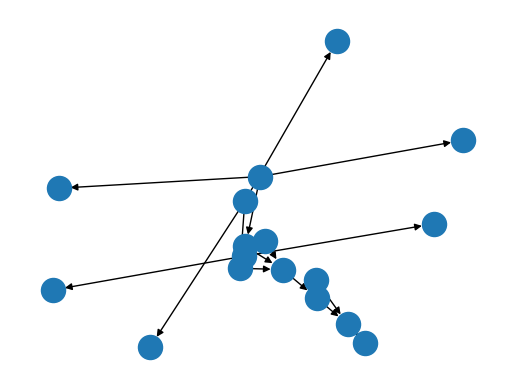

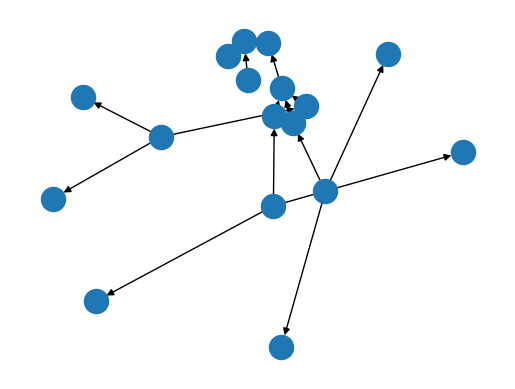

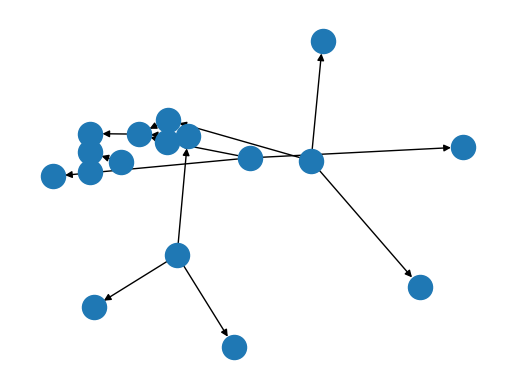

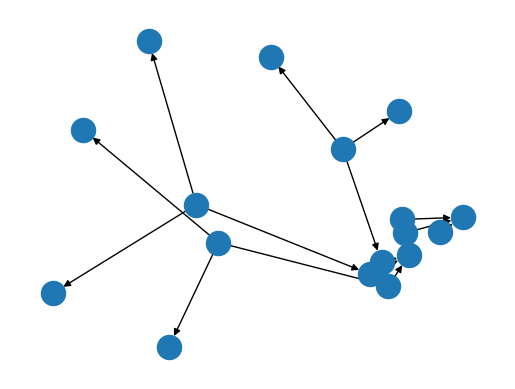

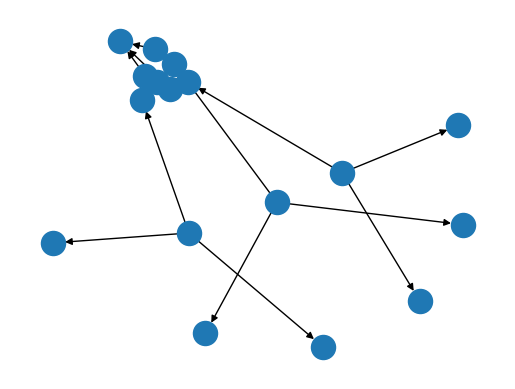

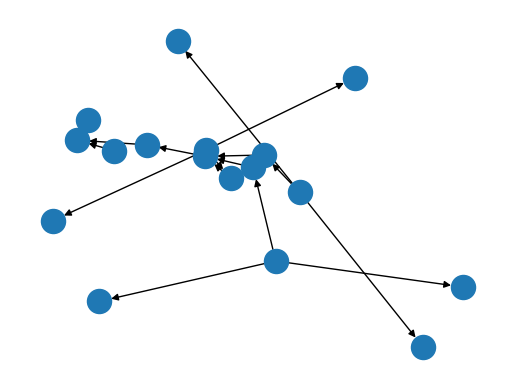

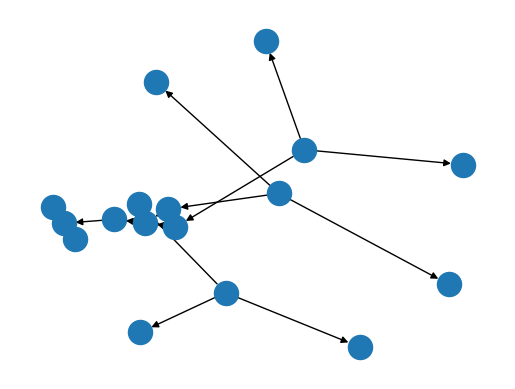

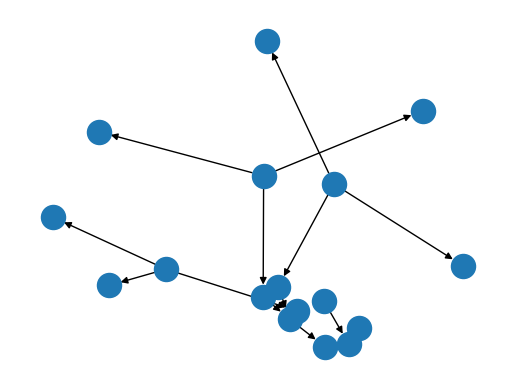

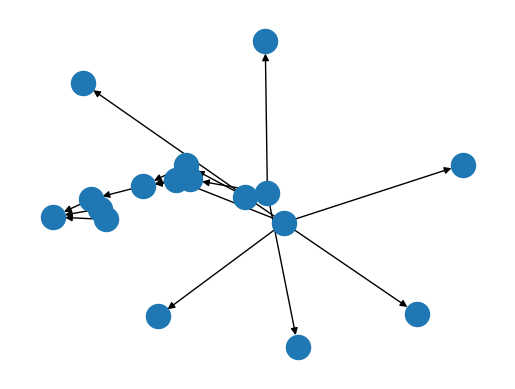

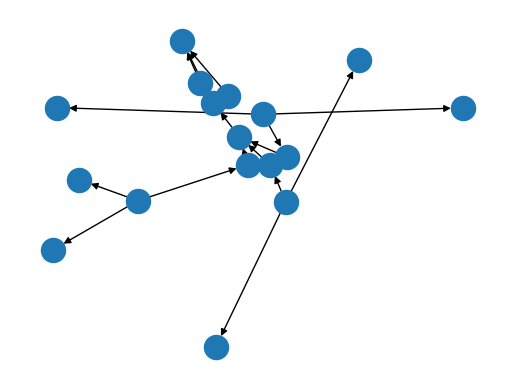

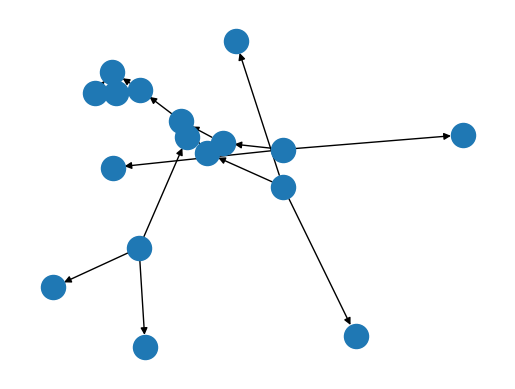

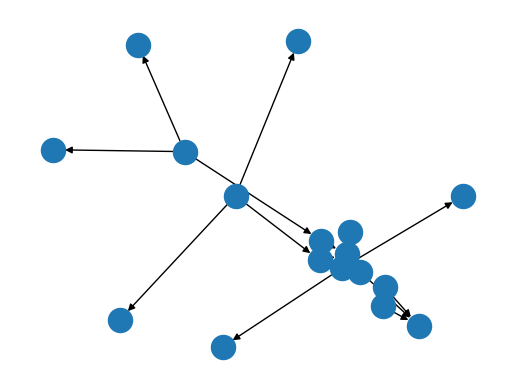

In [7]:
for rule in rules:
    rule.view()

In [7]:
likelihood_ctrl = ctrl.ControlSystem(rules)
likelihood_sim = ctrl.ControlSystemSimulation(likelihood_ctrl)

## Defuzzification.

> function for defuzzification using ('cenroid').

In [8]:
def defuzzification(age_value, income_value, history_value):
    likelihood_sim.input['age'] = age_value
    likelihood_sim.input['income'] = income_value
    likelihood_sim.input['history'] = history_value

    likelihood_sim.defuzzify_method = 'centroid'

    likelihood_sim.compute()

    fuzzy_output = likelihood_sim.output['likelihood']

    print(f"Age: {age_value}, Income: {income_value}, History: {history_value} -> Likelihood (Fuzzy Output): {fuzzy_output:.2f}")

    return fuzzy_output

> function to transform numerical output to text.

In [9]:
def likelihood_to_text(value):
    if value < 40:
        return "low"
    elif 40 <= value <= 60:
        return "medium"
    else:
        return "high"


In [10]:
age_value = 30
income_value = 70
history_value = 80

likelihood_sim.input['age'] = age_value
likelihood_sim.input['income'] = income_value
likelihood_sim.input['history'] = history_value

likelihood_result = defuzzification(age_value, income_value, history_value)

print(f"Age: {age_value}, Income: {income_value}, History: {history_value} -> Likelihood (Fuzzy Output): {likelihood_result}")

print(f"Age: {age_value}, Income: {income_value}, History: {history_value} -> Likelihood (Fuzzy Output): {likelihood_to_text(likelihood_result)}")

Age: 30, Income: 70, History: 80 -> Likelihood (Fuzzy Output): 84.44
Age: 30, Income: 70, History: 80 -> Likelihood (Fuzzy Output): 84.4439997772757
Age: 30, Income: 70, History: 80 -> Likelihood (Fuzzy Output): high


## Test Cases.

In [11]:
test_data = [
    {'age': 25, 'income': 70, 'history': 80},
    {'age': 65, 'income': 30, 'history': 20},
    {'age': 40, 'income': 60, 'history': 50},
    {'age': 20, 'income': 20, 'history': 90},
    {'age': 70, 'income': 90, 'history': 70},
]

for data in test_data:
    print('==============================================')
    print(data)
    result = defuzzification(data['age'], data['income'], data['history'])
    print("likelihood of a customer buying a product", likelihood_to_text(result))
    print("\n")

{'age': 25, 'income': 70, 'history': 80}
Age: 25, Income: 70, History: 80 -> Likelihood (Fuzzy Output): 84.44
likelihood of a customer buying a product high


{'age': 65, 'income': 30, 'history': 20}
Age: 65, Income: 30, History: 20 -> Likelihood (Fuzzy Output): 12.72
likelihood of a customer buying a product low


{'age': 40, 'income': 60, 'history': 50}
Age: 40, Income: 60, History: 50 -> Likelihood (Fuzzy Output): 57.24
likelihood of a customer buying a product medium


{'age': 20, 'income': 20, 'history': 90}
Age: 20, Income: 20, History: 90 -> Likelihood (Fuzzy Output): 50.00
likelihood of a customer buying a product medium


{'age': 70, 'income': 90, 'history': 70}
Age: 70, Income: 90, History: 70 -> Likelihood (Fuzzy Output): 83.11
likelihood of a customer buying a product high




c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


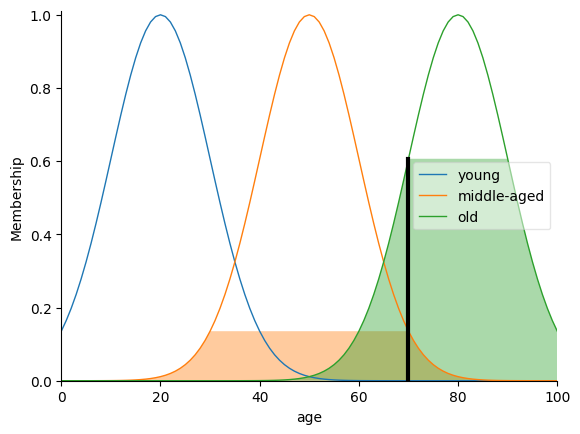

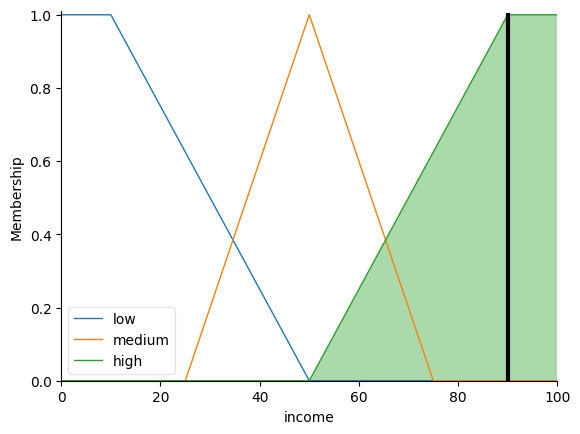

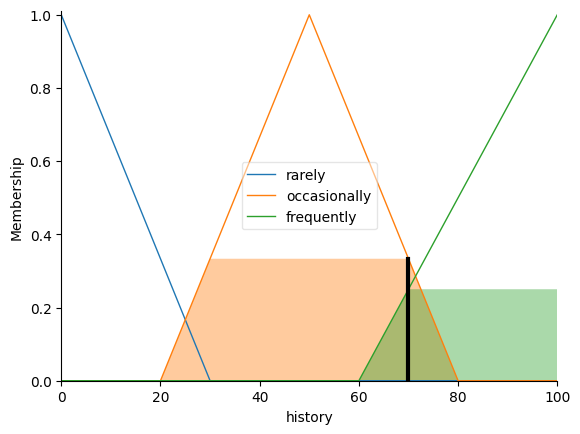

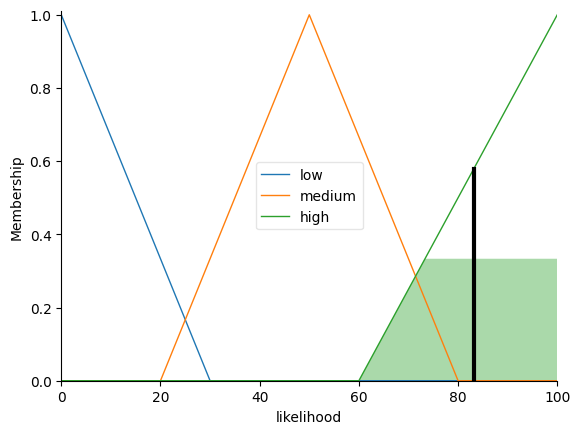

In [12]:
age.view(sim=likelihood_sim)
income.view(sim=likelihood_sim)
history.view(sim=likelihood_sim)
likelihood.view(sim=likelihood_sim)

## Data set

> generate dataset

In [13]:
def generate_data(num_rows):
    ages = ['young', 'middle-aged', 'old']
    incomes = ['low', 'medium', 'high']
    purchase_histories = ['rarely', 'occasionally', 'frequently']
    
    likelihood_mapping = {
        ('young', 'low', 'rarely'): 'low',
        ('young', 'low', 'occasionally'): 'medium',
        ('young', 'low', 'frequently'): 'medium',
        ('young', 'medium', 'rarely'): 'low',
        ('young', 'medium', 'occasionally'): 'medium',
        ('young', 'medium', 'frequently'): 'high',
        ('young', 'high', 'rarely'): 'medium',
        ('young', 'high', 'occasionally'): 'high',
        ('young', 'high', 'frequently'): 'high',
        ('middle-aged', 'low', 'rarely'): 'low',
        ('middle-aged', 'low', 'occasionally'): 'medium',
        ('middle-aged', 'low', 'frequently'): 'medium',
        ('middle-aged', 'medium', 'rarely'): 'low',
        ('middle-aged', 'medium', 'occasionally'): 'medium',
        ('middle-aged', 'medium', 'frequently'): 'high',
        ('middle-aged', 'high', 'rarely'): 'medium',
        ('middle-aged', 'high', 'occasionally'): 'high',
        ('middle-aged', 'high', 'frequently'): 'high',
        ('old', 'low', 'rarely'): 'low',
        ('old', 'low', 'occasionally'): 'low',
        ('old', 'low', 'frequently'): 'medium',
        ('old', 'medium', 'rarely'): 'low',
        ('old', 'medium', 'occasionally'): 'low',
        ('old', 'medium', 'frequently'): 'medium',
        ('old', 'high', 'rarely'): 'medium',
        ('old', 'high', 'occasionally'): 'high',
        ('old', 'high', 'frequently'): 'high',
    }
    
    data = []
    
    for _ in range(num_rows):
        age = random.choice(ages)
        income = random.choice(incomes)
        purchase_history = random.choice(purchase_histories)
        
        likelihood = likelihood_mapping.get((age, income, purchase_history), 'unknown')
        if likelihood == 'unknown':
            print("UNKNOWN VALUE")
        
        if age == 'young':
            age_value = random.randint(0, 30)
        elif age == 'middle-aged':
            age_value = random.randint(30, 60)
        else:
            age_value = random.randint(60, 100)
        
        if income == 'low':
            income_value = random.randint(0, 30)
        elif income == 'medium':
            income_value = random.randint(30, 60)
        else:
            income_value = random.randint(60, 100)
        
        if purchase_history == 'rarely':
            purchase_history_value = random.randint(0, 30)
        elif purchase_history == 'occasionally':
            purchase_history_value = random.randint(30, 65)
        else:
            purchase_history_value = random.randint(65, 100)
        
        row = {
            'age': age,
            'age_value': age_value,
            'income': income,
            'income_value': income_value,
            'purchase_history': purchase_history,
            'purchase_history_value': purchase_history_value,
            'likelihood_of_buying': likelihood
        }
        data.append(row)
    
    return data

In [14]:
def test_fuzzy_sys():
    data = generate_data(100)
    number_of_right_outputs = 0
    i = 1
    for sample in data:
        print('==============================================')
        print(i, "/ 100")
        i += 1
        likelihood_results = defuzzification(sample["age_value"], sample["income_value"], sample["purchase_history_value"])
        result = likelihood_to_text(likelihood_results)
        if result == sample["likelihood_of_buying"]:
            number_of_right_outputs += 1
        else:
            print("ERROR:")
            print(sample)
            print("result: ", result)
        
    acc = number_of_right_outputs/100
    print("Accuracy : ", acc)

In [20]:
test_fuzzy_sys()

1 / 100
Age: 43, Income: 86, History: 8 -> Likelihood (Fuzzy Output): 50.00
2 / 100
Age: 10, Income: 98, History: 65 -> Likelihood (Fuzzy Output): 84.44
3 / 100
Age: 10, Income: 39, History: 17 -> Likelihood (Fuzzy Output): 12.05
4 / 100
Age: 18, Income: 92, History: 9 -> Likelihood (Fuzzy Output): 50.00
5 / 100
Age: 16, Income: 15, History: 34 -> Likelihood (Fuzzy Output): 50.00
6 / 100
Age: 58, Income: 46, History: 68 -> Likelihood (Fuzzy Output): 53.97
ERROR:
{'age': 'middle-aged', 'age_value': 58, 'income': 'medium', 'income_value': 46, 'purchase_history': 'frequently', 'purchase_history_value': 68, 'likelihood_of_buying': 'high'}
result:  medium
7 / 100
Age: 35, Income: 5, History: 2 -> Likelihood (Fuzzy Output): 12.72
8 / 100
Age: 62, Income: 1, History: 78 -> Likelihood (Fuzzy Output): 47.52
9 / 100
Age: 8, Income: 47, History: 22 -> Likelihood (Fuzzy Output): 26.38
10 / 100
Age: 28, Income: 95, History: 17 -> Likelihood (Fuzzy Output): 50.00
11 / 100
Age: 90, Income: 83, Histor